In [1]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.collections import LineCollection


from src.sdes import sde_kunita, sde_utils, sde_data

Butterflies

(200,)


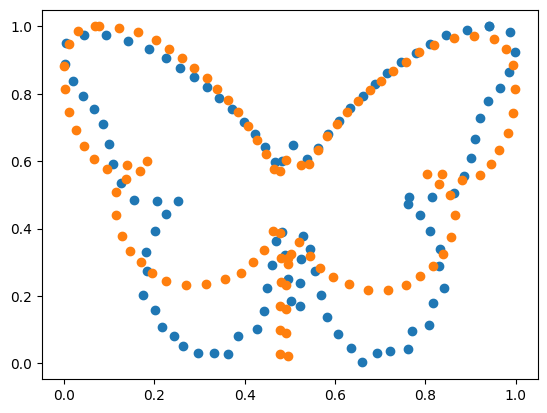

In [2]:
from src import data_boundary_pts

num_trajs = 1
T = 1.
N = 100
num_landmarks = 100

keys = jax.random.split(jax.random.PRNGKey(0), num_trajs)

sigma = 0.5
kappa = 1 / (sigma * jnp.sqrt(2 * jnp.pi))

x0 = data_boundary_pts.butterfly_tom(num_landmarks)
print(x0.shape)

y = data_boundary_pts.butterfly2(num_landmarks)

plt.scatter(x0[::2], x0[1::2])
plt.scatter(y[::2], y[1::2])
plt.show()

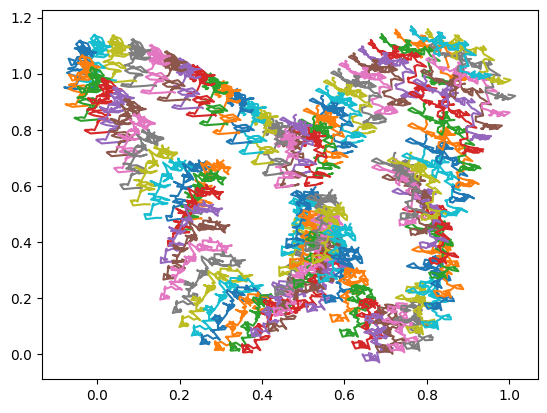

In [3]:
kunita = sde_kunita.kunita(T=T, N=N, num_landmarks=num_landmarks, sigma=sigma, kappa=kappa, grid_size=25)

forward_butterfly_gen = sde_data.data_forward(x0, kunita)
_ts, fw_trajs_butterfly, _corr = forward_butterfly_gen(keys)

fw_trajs_butterfly = fw_trajs_butterfly.reshape(num_trajs, N, -1, 2)

fig, ax = plt.subplots()
for landmark in jnp.arange(0, num_landmarks, 1):
    plt.plot(fw_trajs_butterfly[0, :, landmark, 0], fw_trajs_butterfly[0, :, landmark, 1])
plt.show()

Emojis

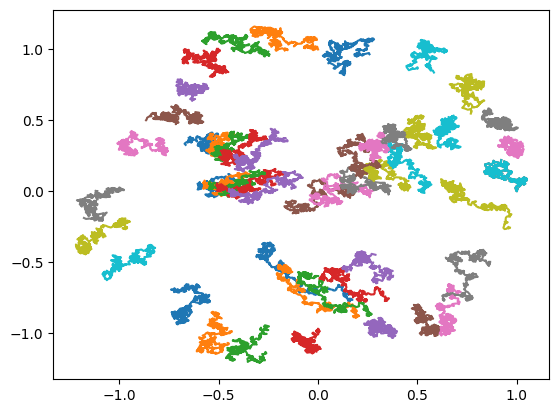

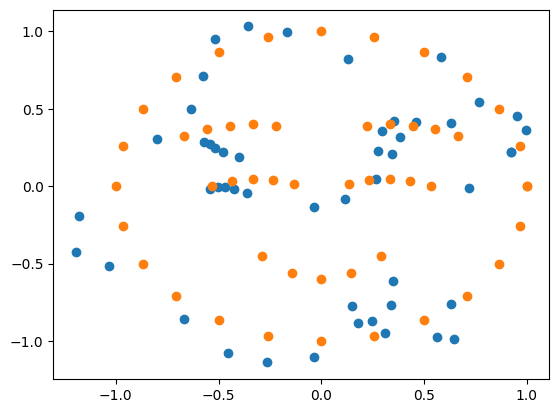

In [58]:
from src import data_boundary_pts

emoji_fns = data_boundary_pts.smiley_face_fns(5, 5, 5, 25)
emoji = data_boundary_pts.flattened_array_from_faces(emoji_fns)

num_trajs = 2
T = 2.
N = 500

keys = jax.random.split(jax.random.PRNGKey(0), num_trajs)

sigma = 0.2
kappa = 1 / (sigma * jnp.sqrt(2 * jnp.pi))
kunita = sde_kunita.kunita(T=T, N=N, num_landmarks=50, sigma=sigma, kappa=kappa, grid_size=25)

forward_emoji_gen = sde_data.data_forward(emoji, kunita)

_, fw_trajs_emoji, _ = forward_emoji_gen(keys)

fw_trajs_emoji = fw_trajs_emoji.reshape(num_trajs, N, -1, 2)

fig, ax = plt.subplots()
for landmark in jnp.arange(0, emoji.shape[0], 1):
    plt.plot(fw_trajs_emoji[0, :, landmark, 0], fw_trajs_emoji[0, :, landmark, 1])
plt.show()

fig, ax = plt.subplots()
plt.scatter(fw_trajs_emoji[0, -1, :, 0], fw_trajs_emoji[0, -1, :, 1])
plt.scatter(fw_trajs_emoji[0, 0, :, 0], fw_trajs_emoji[0, 0, :, 1])
plt.show()


(50, 2)
50


/var/folders/d9/20m23sk115gcmdjdyps1q0yh0000gn/T/ipykernel_96240/4273077024.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(smiley[i, 0], smiley[i, 1], c=c)
/var/folders/d9/20m23sk115gcmdjdyps1q0yh0000gn/T/ipykernel_96240/4273077024.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pensive[i, 0], pensive[i, 1], c=c)


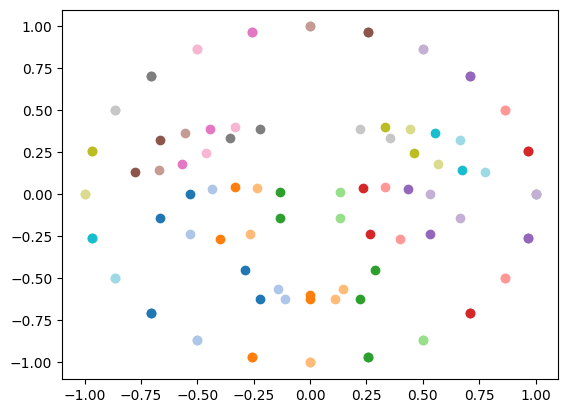

In [40]:
smiley_fns = data_boundary_pts.smiley_face_fns(5, 5, 5, 25)
smiley = data_boundary_pts.flattened_array_from_faces(smiley_fns)

pensive_fns = data_boundary_pts.pensive_face_fns(5, 5, 5, 25)
pensive = data_boundary_pts.flattened_array_from_faces(pensive_fns)

print(smiley.shape)
print(len(smiley))

cmap = plt.get_cmap("tab20")
for i in range(len(smiley)):
    # c = cmap(i / len(smiley))
    c = cmap(i%20)
    plt.scatter(smiley[i, 0], smiley[i, 1], c=c)
    plt.scatter(pensive[i, 0], pensive[i, 1], c=c)
plt.show()



In [2]:
def x0(num_landmarks):
    x0_1 = jnp.linspace(0, 1, num_landmarks)
    x0_2 = jnp.zeros(num_landmarks)
    x0 = jnp.stack([x0_1, x0_2], axis=1).flatten()
    return x0

def sample_circle(num_landmarks: int, radius=1., centre=jnp.asarray([0, 0])) -> jnp.ndarray:
    theta = jnp.linspace(0, 2 * jnp.pi, num_landmarks, endpoint=False)
    x = jnp.cos(theta)
    y = jnp.sin(theta)
    return (radius * jnp.stack([x, y], axis=1) + centre).flatten()

Setup for both forward and reverse data generation

In [3]:
lots_of_landmarks = 200
less_landmarks = 5

x0_less = sample_circle(less_landmarks, 0.5)
x0_lots = sample_circle(lots_of_landmarks, 0.5)

num_trajs = 2
T = 1.
N = 100

keys = jax.random.split(jax.random.PRNGKey(0), num_trajs)

Forward data generation

In [4]:
forward_lots = sde_kunita.data_forward(x0_lots, T, N)
_, fw_trajs_lots, _ = forward_lots(keys)

forward_less = sde_kunita.data_forward(x0_less, T, N)
_, fw_trajs_less, _ = forward_less(keys)


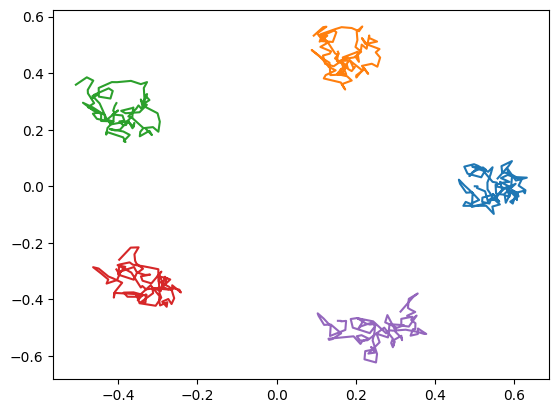

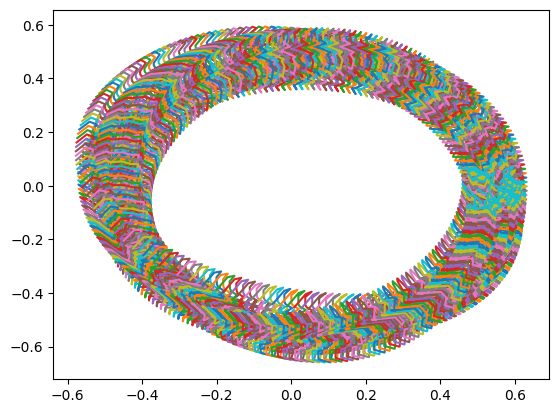

In [5]:
fw_trajs_lots = fw_trajs_lots.reshape(num_trajs, N, -1, 2)
fw_trajs_less = fw_trajs_less.reshape(num_trajs, N, -1, 2)

for landmark in jnp.arange(0,less_landmarks, 1):
    plt.plot(fw_trajs_less[0, :, landmark, 0], fw_trajs_less[0, :, landmark, 1])
plt.show()

for landmark in jnp.arange(0, lots_of_landmarks, 1):
    plt.plot(fw_trajs_lots[0, :, landmark, 0], fw_trajs_lots[0, :, landmark, 1])
plt.show()


Reverse data generation (without correction computation)

In [6]:
vector_fields = sde_kunita.vector_fields_reverse()
backward_lots = sde_utils.data_forward(x0_lots, T, N, vector_fields, bm_shape=(2 * 5 ** 2,))
_, bw_trajs_lots, _ = backward_lots(keys)


backward_less = sde_utils.data_forward(x0_less, T, N, vector_fields, bm_shape=(2 * 5 ** 2,))
_, bw_trajs_less, _ = backward_less(keys)

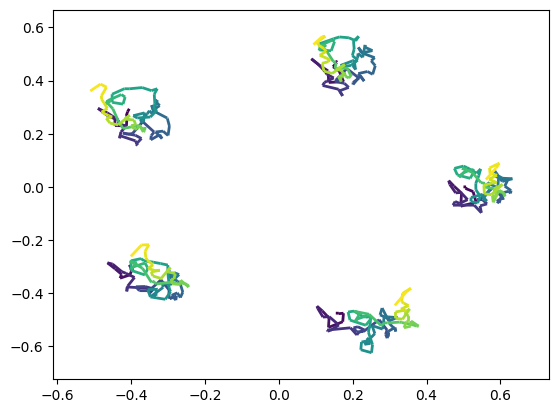

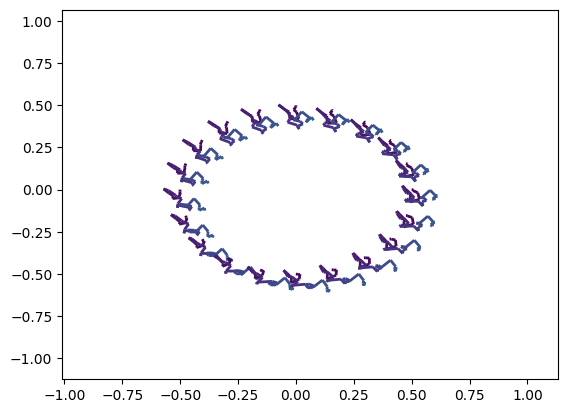

In [7]:
bw_trajs_lots = bw_trajs_lots.reshape(num_trajs, N, -1, 2)
bw_trajs_less = bw_trajs_less.reshape(num_trajs, N, -1, 2)

fig, ax = plt.subplots()

for landmark in jnp.arange(0, less_landmarks, 1):
    x = bw_trajs_less[0, :, landmark, 0]
    y = bw_trajs_less[0, :, landmark, 1]
    points = jnp.array([x, y]).T.reshape(-1, 1, 2)
    segments = jnp.concatenate([points[:-1], points[1:]], axis=1)
    norm = plt.Normalize(0, N)
    lc = LineCollection(segments, cmap='viridis')
    lc.set_array(jnp.arange(0, N, 1))
    lc.set_linewidth(2)
    line = ax.add_collection(lc)
c = 0.1
ax.set_xlim([bw_trajs_less[0, :, :, 0].min() - c, bw_trajs_less[0, :, :, 0].max() + c])
ax.set_ylim([bw_trajs_less[0, :, :, 1].min() - c, bw_trajs_less[0, :, :, 1].max() + c])
    # plt.plot(bw_trajs_less[0, :, landmark, 0], bw_trajs_less[0, :, landmark, 1])
plt.show()

fig, ax = plt.subplots()
for landmark in jnp.arange(0, lots_of_landmarks, 10):
    x = bw_trajs_lots[0, :30, landmark, 0]
    y = bw_trajs_lots[0, :30, landmark, 1]
    points = jnp.array([x, y]).T.reshape(-1, 1, 2)
    segments = jnp.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap='viridis')
    lc.set_array(jnp.arange(0, N, 1))
    lc.set_linewidth(2)
    line = plt.gca().add_collection(lc)
    # plt.plot(bw_trajs_lots[0, :, landmark, 0], bw_trajs_lots[0, :, landmark, 1])
c = 0.5
ax.set_xlim([bw_trajs_less[0, :, :, 0].min() - c, bw_trajs_less[0, :, :, 0].max() + c])
ax.set_ylim([bw_trajs_less[0, :, :, 1].min() - c, bw_trajs_less[0, :, :, 1].max() + c])
plt.show()

Reverse data generation (with correction computation)

In [8]:
backward_lots = sde_kunita.data_reverse(x0_lots, T, N)
_, bw_trajs_lots, _ = backward_lots(keys)

backward_less = sde_kunita.data_reverse(x0_less, T, N)
_, bw_trajs_less, _ = backward_less(keys)

forward_lots = sde_kunita.data_forward(x0_lots, T, N)
_, fw_trajs_lots, _ = forward_lots(keys)

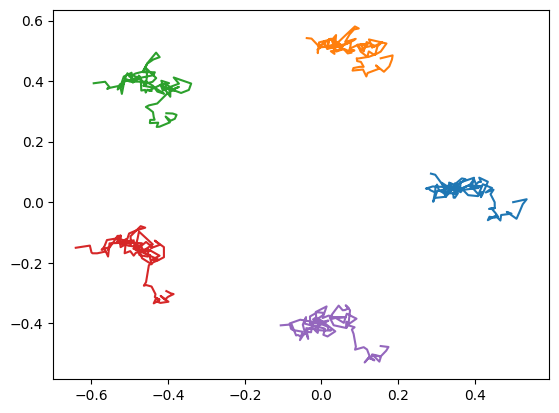

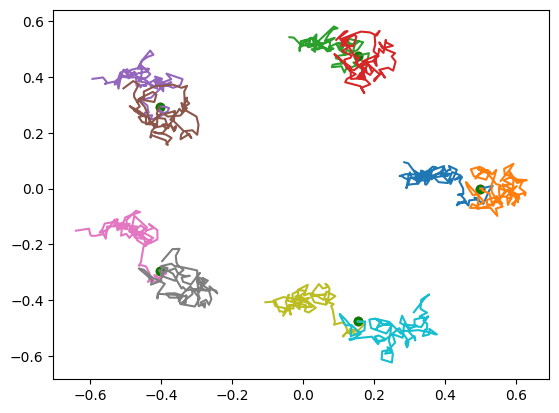

In [9]:
bw_trajs_lots = bw_trajs_lots.reshape(num_trajs, N, -1, 2)
bw_trajs_less = bw_trajs_less.reshape(num_trajs, N, -1, 2)

fw_trajs_lots = fw_trajs_lots.reshape(num_trajs, N, -1, 2)

for landmark in jnp.arange(0, less_landmarks, 1):
    plt.plot(bw_trajs_less[0, :, landmark, 0], bw_trajs_less[0, :, landmark, 1])
plt.show()

for landmark in jnp.arange(0, lots_of_landmarks, 40):
    plt.scatter(bw_trajs_lots[0, 0, landmark, 0], bw_trajs_lots[0, 0, landmark, 1], c='r')
    plt.plot(bw_trajs_lots[0, :, landmark, 0], bw_trajs_lots[0, :, landmark, 1])
    plt.scatter(fw_trajs_lots[0, 0, landmark, 0], fw_trajs_lots[0, 0, landmark, 1], c='g')
    plt.plot(fw_trajs_lots[0, :, landmark, 0], fw_trajs_lots[0, :, landmark, 1])
plt.show()

Kunita flow on emoji

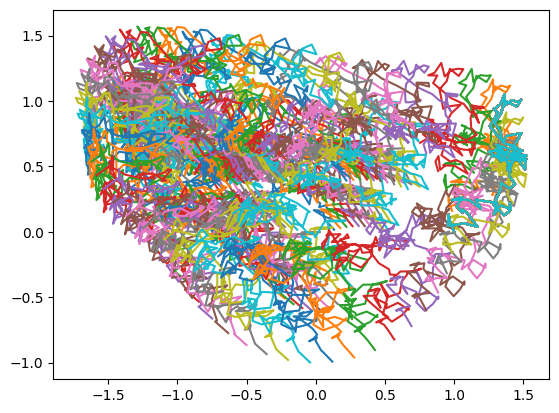

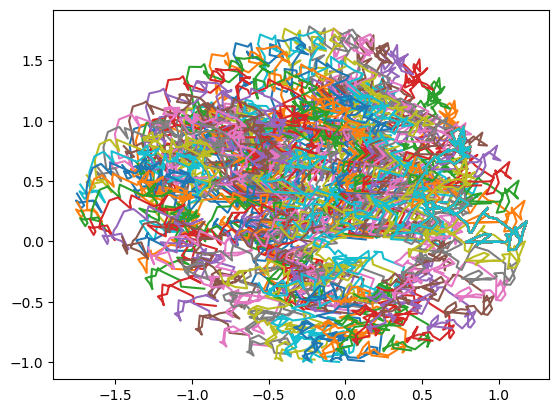

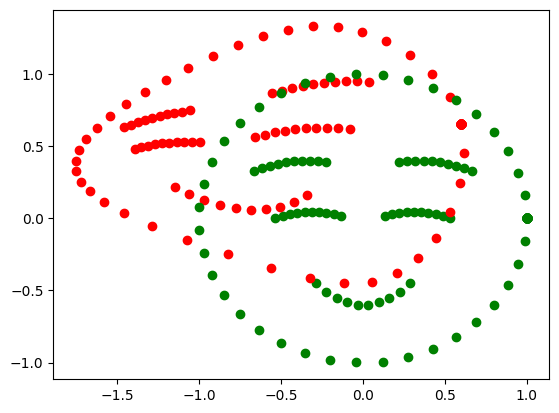

In [14]:
from src import data_boundary_pts

emoji_fns = data_boundary_pts.smiley_face_fns(10, 10, 10, 40)
emoji = data_boundary_pts.flattened_array_from_faces(emoji_fns)

num_trajs = 1
T = 10.
N = 100

keys = jax.random.split(jax.random.PRNGKey(0), num_trajs)

forward_emoji = sde_kunita.data_forward(emoji, T, N)
_, fw_trajs_emoji, _ = forward_emoji(keys)

backward_emoji = sde_kunita.data_reverse(emoji, T, N)
_, bw_trajs_emoji, _ = backward_emoji(keys)

fw_trajs_emoji = fw_trajs_emoji.reshape(num_trajs, N, -1, 2)
bw_trajs_emoji = bw_trajs_emoji.reshape(num_trajs, N, -1, 2)

fig, ax = plt.subplots()
for landmark in jnp.arange(0, emoji.shape[0], 1):
    plt.plot(bw_trajs_emoji[0, :, landmark, 0], bw_trajs_emoji[0, :, landmark, 1])
plt.show()

fig, ax = plt.subplots()
for landmark in jnp.arange(0, emoji.shape[0], 1):
    plt.plot(fw_trajs_emoji[0, :, landmark, 0], fw_trajs_emoji[0, :, landmark, 1])
plt.show()

fig, ax = plt.subplots()
for landmark in jnp.arange(0, emoji.shape[0], 1):
    plt.scatter(fw_trajs_emoji[0, -1, landmark, 0], fw_trajs_emoji[0, -1, landmark, 1], c='r')
    plt.scatter(fw_trajs_emoji[0, 0, landmark, 0], fw_trajs_emoji[0, 0, landmark, 1], c='g')
plt.show()

jnp.save("morphed_emoji.npy", fw_trajs_emoji[0, -1, :, :])
